In [1]:
import pandas as pd
import seaborn as sns
import os
import utils
import matplotlib.pyplot as plt
import seaborn.objects as so
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
data = pd.read_csv(os.path.join('data','cleaned_responses.csv'))
if not os.path.exists('figures'):
    os.makedirs('figures') #for outputs

data = data.loc[data['Science_Cat'] == 'Life Sciences'] # filter for Life Sciences only

## What image analysis tools have you used before?

In [25]:
col = 'What image analysis tools have you used before? (check all that apply)'

In [26]:
df_grouped = utils.make_counts_per_multiselect_group(data,
                                         single_select_col= 'Single_Role',
                                         multi_select_col= col)


/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (5), which may not be intended.
  warnings.warn(message, UserWarning)


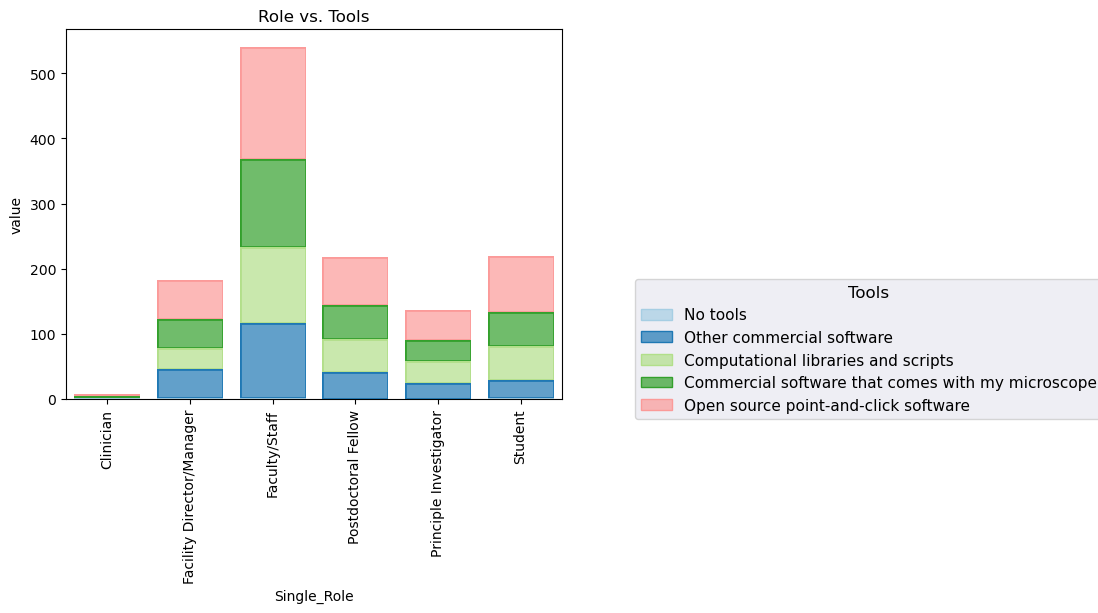

In [27]:
utils.plot_single_vs_multi(df_grouped,
                           legend_title = 'Tools',
                           plottitle = 'Role vs. Tools',
                           plot_filename=os.path.join('figures','Role_vs_Tools_LS_byRole.png')
                           )

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (6), which may not be intended.
  warnings.warn(message, UserWarning)


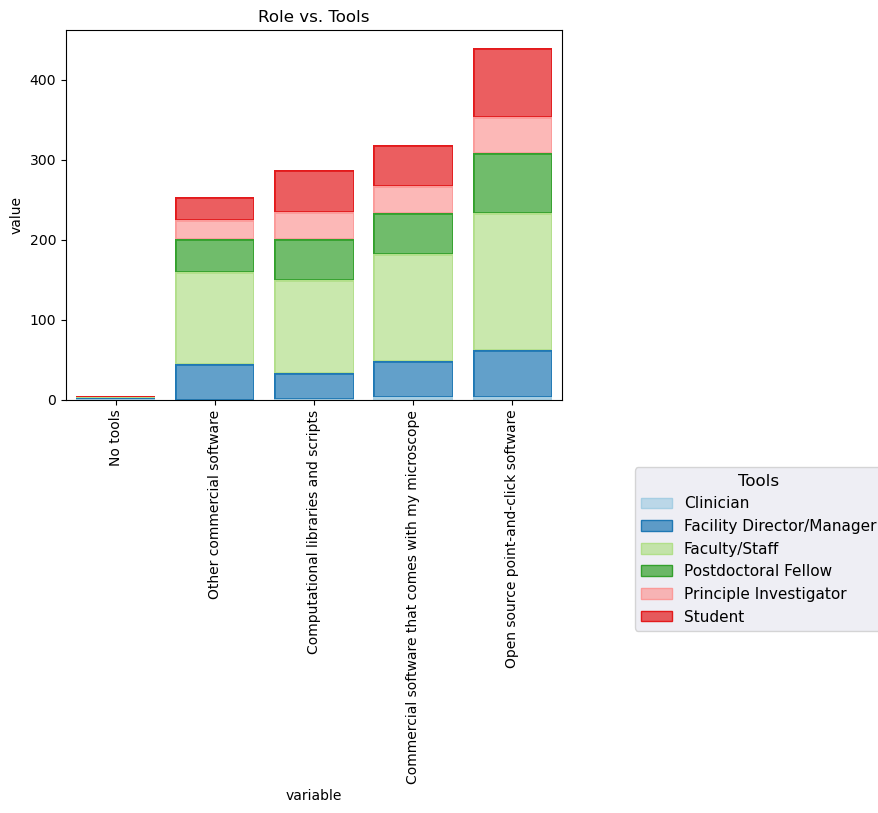

In [28]:
utils.plot_single_vs_multi(df_grouped,
                           legend_title = 'Tools',
                           plottitle = 'Role vs. Tools',
                           plot_filename=os.path.join('figures','Role_vs_Tools_LS_byTool.png'),
                           groupbyfirstcol=False
                           )

## What image analysis tools do you use the most?

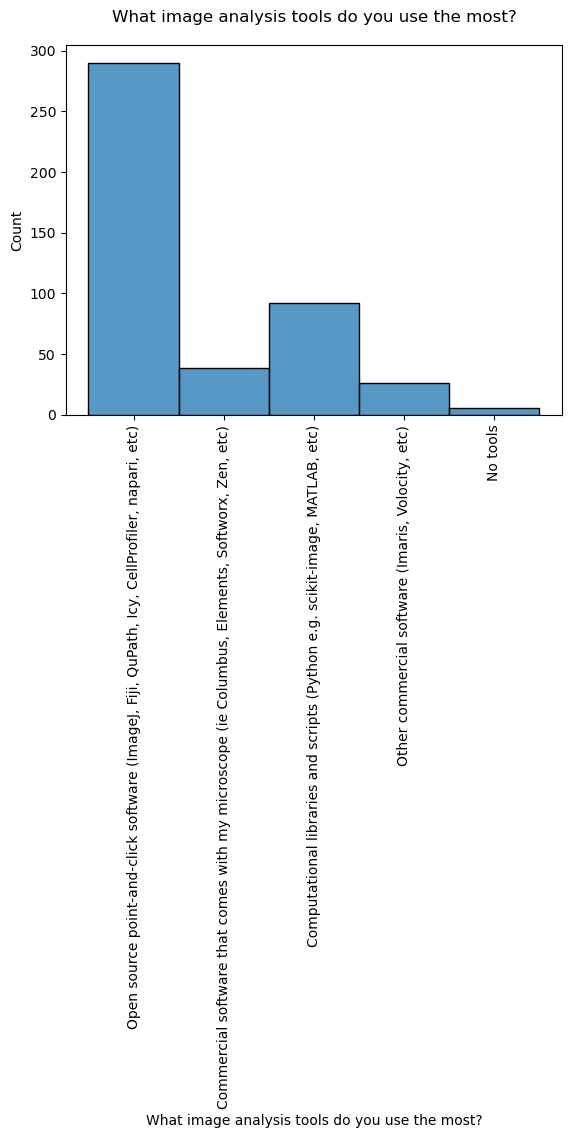

In [29]:
col = 'What image analysis tools do you use the most?'
utils.single_select(data, plot_filename=os.path.join('figures','IA_tools_LS.png'),
                    type='histogram',
                column=col,
                hue=None, rotate_x=True,)

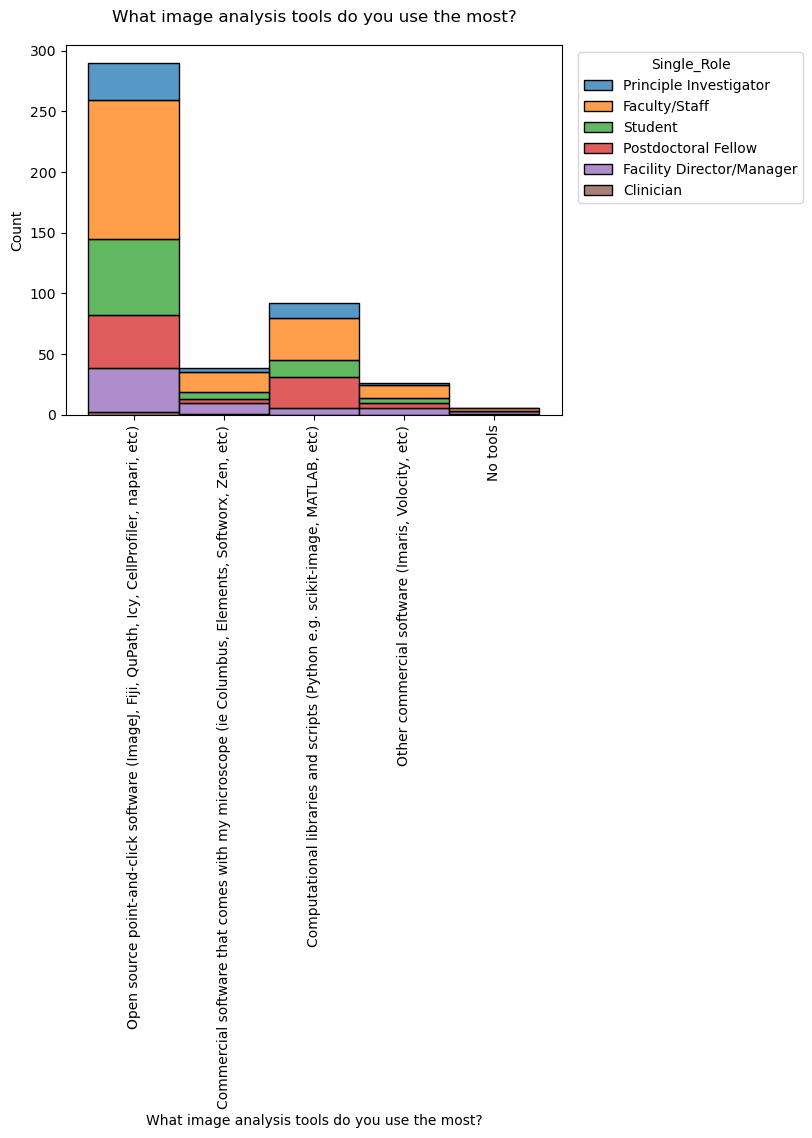

In [30]:
col = 'What image analysis tools do you use the most?'
utils.single_select(data, plot_filename=os.path.join('figures','IA_Tools_by_role_LS.png'),
                    type='histogram',
                column=col,
                hue='Single_Role', rotate_x=True,
                multiple="stack")

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (5), which may not be intended.
  warnings.warn(message, UserWarning)


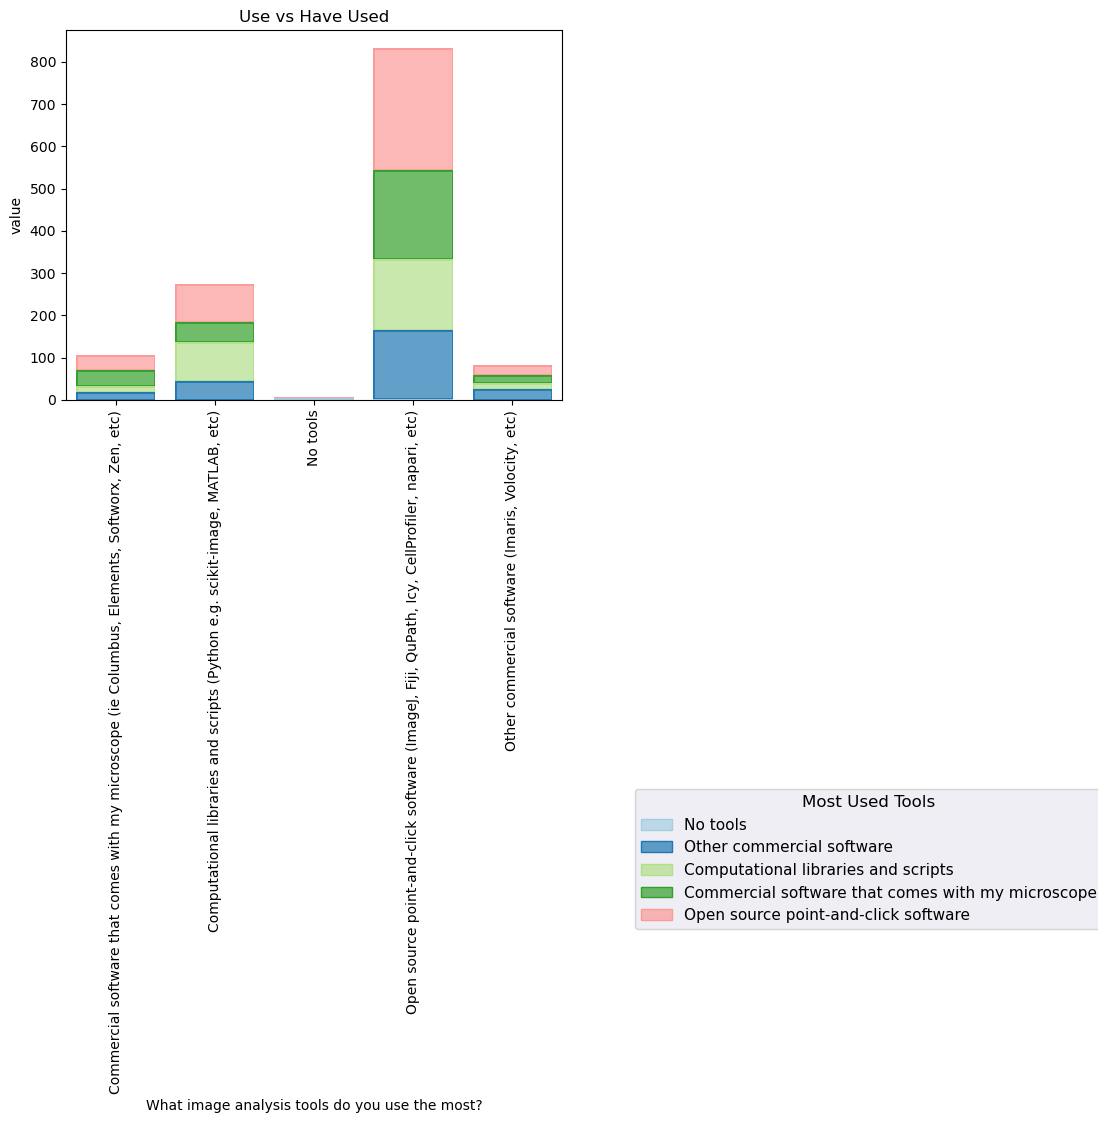

In [31]:
df_grouped = utils.make_counts_per_multiselect_group(data,
                                         single_select_col= 'What image analysis tools do you use the most?',
                                         multi_select_col= 'What image analysis tools have you used before? (check all that apply)')
utils.plot_single_vs_multi(df_grouped,
                           legend_title = 'Most Used Tools',
                           plottitle = 'Use vs Have Used',
                           plot_filename=os.path.join('figures','Tools_Use_vs_Have_Used_LS_byHaveUsed.png')
                           )

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (5), which may not be intended.
  warnings.warn(message, UserWarning)


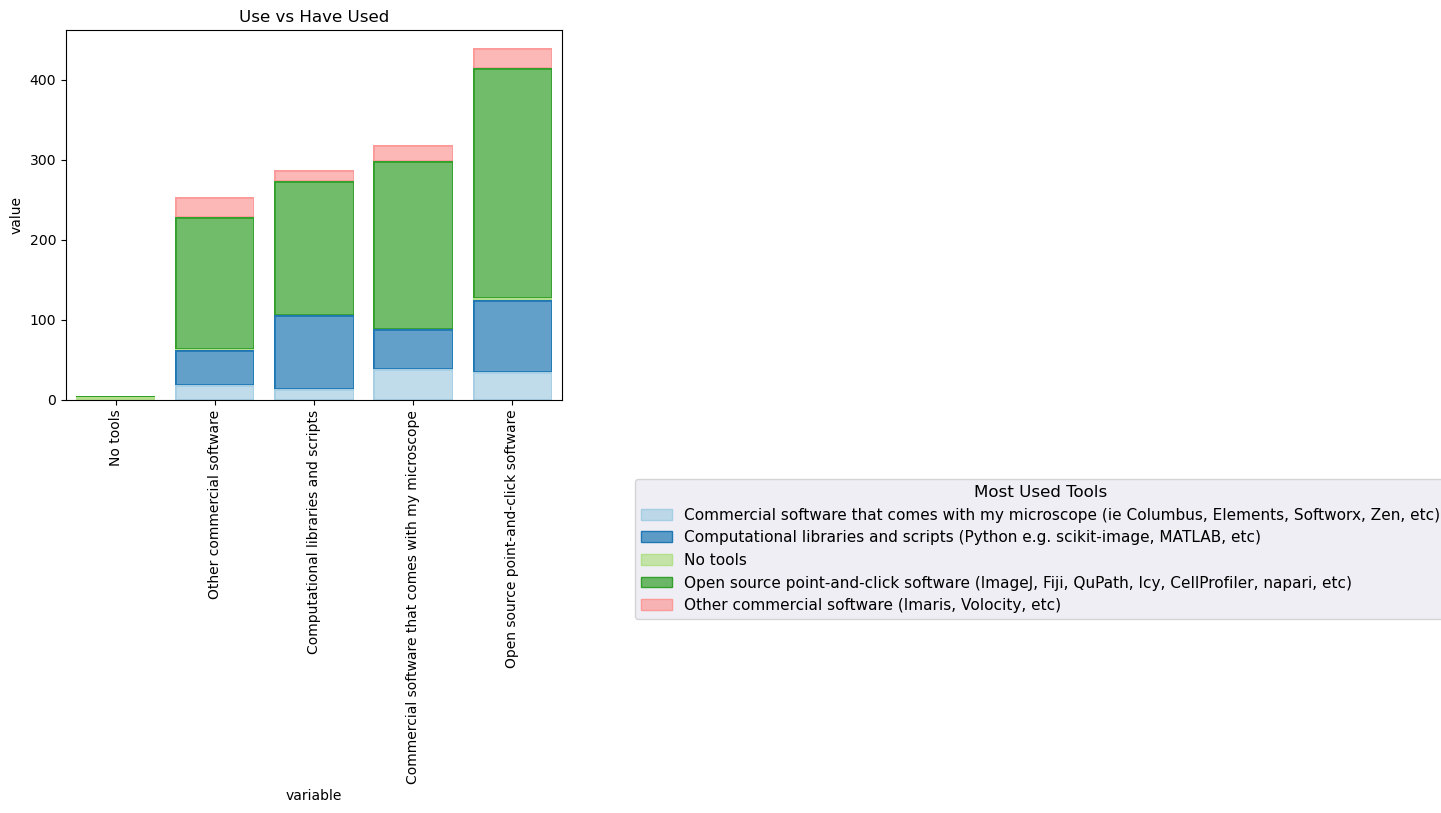

In [32]:
utils.plot_single_vs_multi(df_grouped,
                           legend_title = 'Most Used Tools',
                           plottitle = 'Use vs Have Used',
                           plot_filename=os.path.join('figures','Tools_Use_vs_Have_Used_LS_byMostUsed.png'),
                           groupbyfirstcol=False)

## What makes you select Open Source tools?

In [3]:
df = data[[x for x in data.columns if 'napari' in x]]
# make the columns look nicer
df.columns = [x.replace('If/when you use open source point-and-click software tools (e.g. ImageJ, Fiji, QuPath, Icy, CellProfiler, napari or others), what makes you select these tools in particular? ','') for x in df.columns]
df.columns = [x.replace('[','').replace(']','') for x in df.columns]

df = utils.df_for_percentage_stackedcharts(df)
df

,index,Very important,Moderately important,Somewhat important,Not at all important,I do not use these tools
0,Cost,45.4,24.4,22.1,8.1,2.3
1,Ease of use,55.5,29.5,13.4,3.0,1.8
2,Ease of access,75.8,18.4,6.2,0.7,1.8
3,Flexibility,62.0,26.5,9.9,3.0,1.8
4,Availability of tutorials,51.4,28.8,18.9,2.5,2.1
5,The ability to perform analyses without prior ...,35.3,23.3,23.5,18.9,2.5
6,Reproducibility/transparency about how analysi...,54.6,24.9,17.5,4.4,1.8


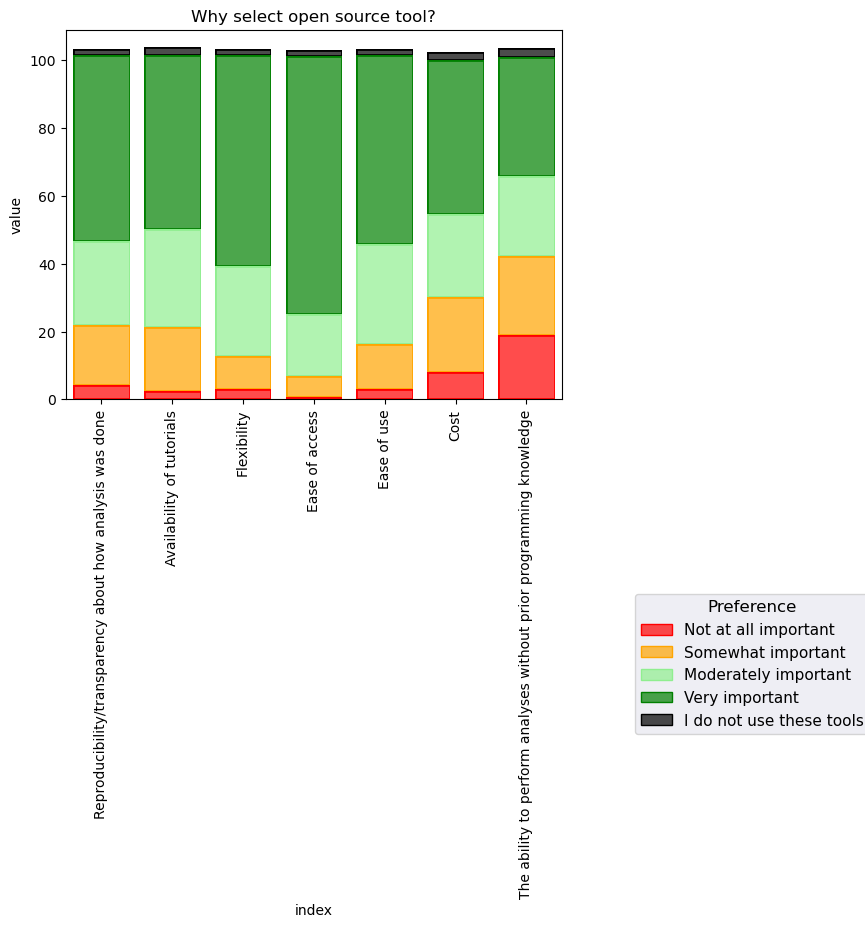

In [5]:
utils.plot_single_vs_multi(df,
                        'Preference',
                        os.path.join('figures', "Why_select_open_source_tool_LS.png"),
                        "Why select open source tool?",
                        groupbyfirstcol=True,
                        colsort=['Not at all important','Somewhat important','Moderately important','Very important'],
                        colorlist = ['red','orange','lightgreen','green','black'])

## What kinds of images?

In [35]:
df = data[[x for x in data.columns if 'What kinds of images' in x]]
df=df.iloc[:,:11] # same naming was used for Physical Sciences and Life Sciences, so we only take the first 10 columns
# make the columns look nicer
df.columns = [x.replace('What kinds of images do you commonly want to analyze (select all that apply? ','') for x in df.columns]
df.columns = [x.replace('[','').replace(']','') for x in df.columns]
df

,Brightfield/DIC/phase-contrast of cells or organisms from manually selected fields,Brightfield/DIC/phase-contrast of cells or organisms from an automated microscope (such as a high content imager),Fluorescent images of cells/organisms from manually selected fields,Fluorescent images of cells/organisms from an automated microscope (such as a high content imager),Histologically stained tissue sections,Electron microscopy,Imaging mass spectrometry,Imaging flow cytometry,Superresolution (PALM/STORM),Autofluorescence imaging (i.e. FLIM),Other
0,NaN,NaN,NaN,"2D, 2D + time, 3D (<3000x3000x100)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,2D,2D,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,"2D, 3D (<3000x3000x100)","2D, 3D (<3000x3000x100)","2D, 2D + time",NaN,NaN,NaN,NaN,NaN,NaN
3,"2D, 2D + time, 3D (<3000x3000x100), 3D + time,...","2D, 2D + time, 3D (<3000x3000x100), 3D + time,...","2D, 2D + time, 3D (<3000x3000x100), 3D + time,...","2D, 2D + time, 3D (<3000x3000x100), 3D + time,...","2D, 3D (<3000x3000x100)","2D, 3D (<3000x3000x100)","2D, 2D + time, 3D (<3000x3000x100), 3D + time,...",NaN,"2D, 2D + time, 3D (<3000x3000x100), 3D + time,...","2D, 2D + time, 3D (<3000x3000x100), 3D + time,...",NaN
4,2D,2D,"2D, 3D (<3000x3000x100)","2D, 3D (<3000x3000x100)",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
478,NaN,NaN,NaN,2D,2D,NaN,NaN,NaN,NaN,NaN,NaN
479,2D,NaN,2D,NaN,2D,NaN,NaN,NaN,NaN,NaN,NaN
480,NaN,NaN,NaN,NaN,NaN,"2D, 3D (<3000x3000x100), 3D (SPIM/large volume...",NaN,NaN,NaN,NaN,NaN
481,"2D, 2D + time",2D,"3D (<3000x3000x100), 3D + time, 3D (SPIM/large...",2D,2D,2D,NaN,NaN,NaN,NaN,NaN


In [36]:
df_grouped = utils.make_counts_per_multiselect_group(df)

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/plot.py:1406: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[41 16 144 8 35 180 33 11 98 6 26 120 240 77 185 78 178 239 120 44 130 43
 98 171 45 8 30 12 13 195 65 7 16 28 6 109 11 3 7 3 4 32 12 5 10 3 9 35 59
 12 31 11 24 68 35 10 35 11 23 64 15 4 10 10 8 21]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_series.loc[idx] = view_scale(layer_df.loc[idx, var])
/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (11), which may not be intended.
  warnings.warn(message, UserWarning)


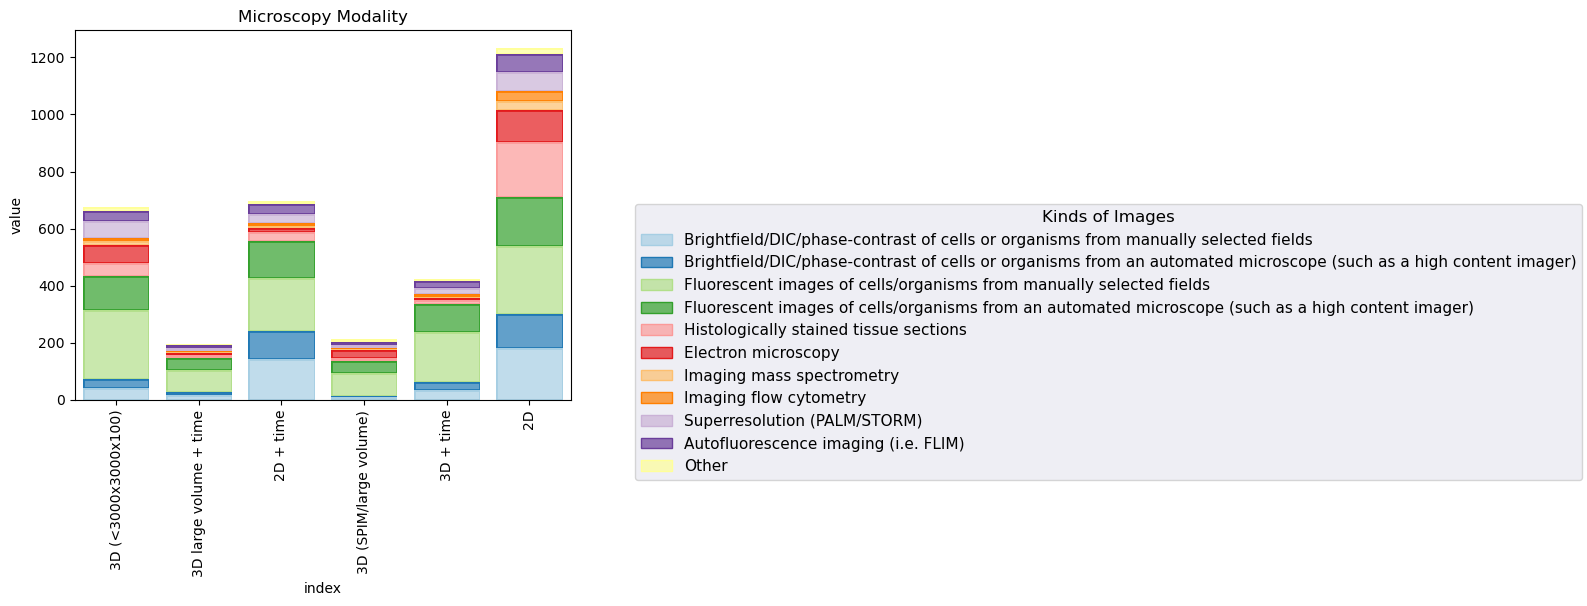

In [37]:
utils.plot_single_vs_multi(df_grouped,
                        'Kinds of Images',
                        os.path.join('figures', 'What_kinds_of_images_LS.png'),
                        'Microscopy Modality',
                        groupbyfirstcol=True)

/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/plot.py:1406: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[41 16 144 8 35 180 33 11 98 6 26 120 240 77 185 78 178 239 120 44 130 43
 98 171 45 8 30 12 13 195 65 7 16 28 6 109 11 3 7 3 4 32 12 5 10 3 9 35 59
 12 31 11 24 68 35 10 35 11 23 64 15 4 10 10 8 21]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  new_series.loc[idx] = view_scale(layer_df.loc[idx, var])
/Users/eweisbar/miniforge3/envs/run_stuff/lib/python3.9/site-packages/seaborn/_core/properties.py:130: UserWarning: The color list has more values (12) than needed (6), which may not be intended.
  warnings.warn(message, UserWarning)


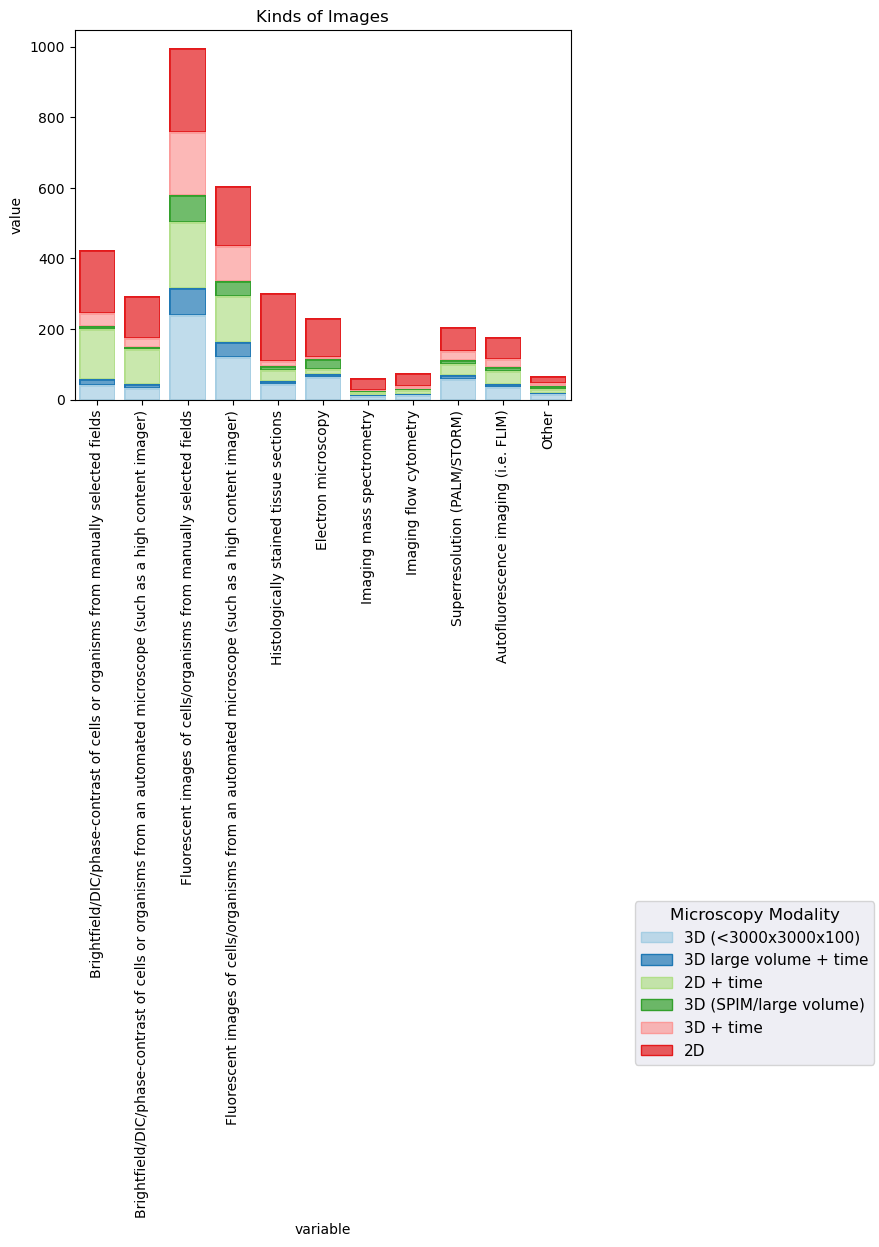

In [38]:
utils.plot_single_vs_multi(df_grouped,
                        'Microscopy Modality',
                        os.path.join('figures', 'What_kinds_of_modalities_LS.png'),
                        'Kinds of Images',
                        groupbyfirstcol=False)

## What image analysis problems? (free text)

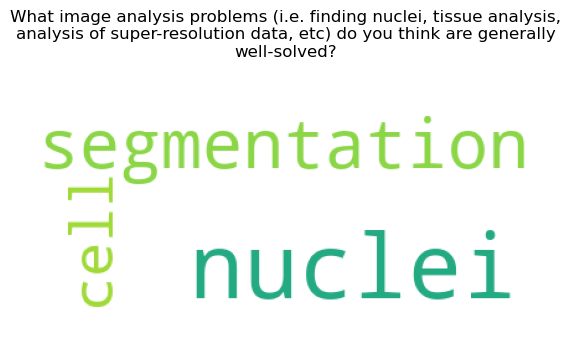

In [39]:
col = 'What image analysis problems (i.e. finding nuclei, tissue analysis, analysis of super-resolution data, etc) do you think are generally well-solved?'
utils.wordcloud_func(col,[],os.path.join('figures','what_problems_solved_LS.png'),data)

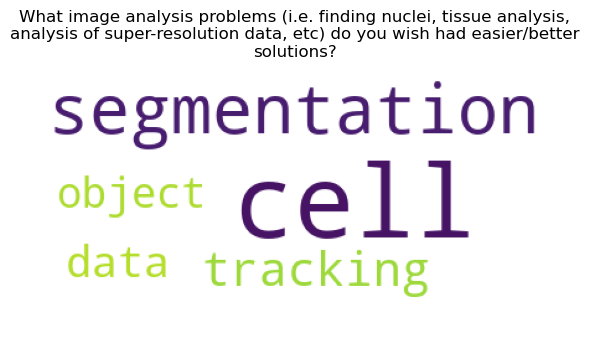

In [40]:
col = 'What image analysis problems (i.e. finding nuclei, tissue analysis, analysis of super-resolution data, etc) do you wish had easier/better solutions?'
utils.wordcloud_func(col,[],os.path.join('figures','what_problems_unsolved_LS.png'),data)

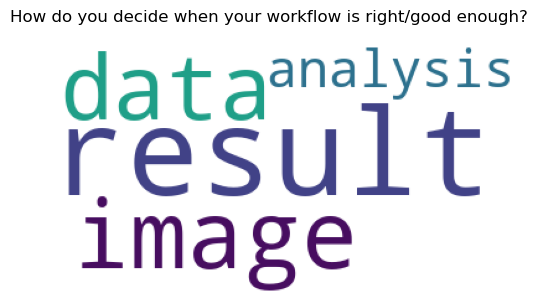

In [41]:
col = 'How do you decide when your workflow is right/good enough?'
utils.wordcloud_func(col,[],os.path.join('figures','good_enough_workflow_LS.png'),data)